In [792]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


# Load the dataset
df_train = pd.read_csv('/Users/iliya/fraud/fraud/archive/fraudTrain.csv') 
# Display the first few rows of the dataset
display(df_train)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [793]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [794]:
df_train.isnull().sum() 

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [795]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [796]:
df_train.shape

(1296675, 23)

<Axes: title={'center': 'Class Distribution'}, xlabel='is_fraud'>

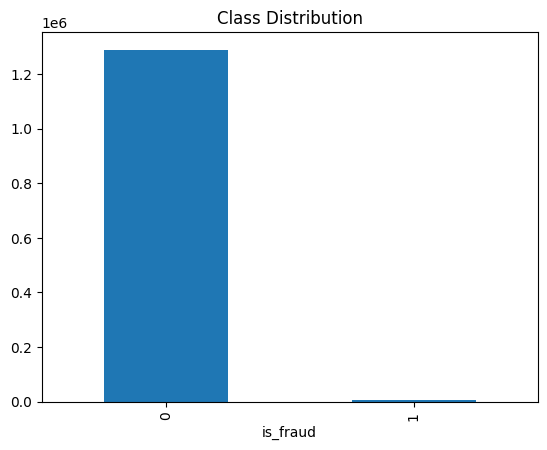

In [797]:
df_train['is_fraud'].value_counts().plot(kind='bar', title='Class Distribution')    

In [798]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [799]:
#  number of 0 class
non_fraud_num = df_train['is_fraud'].value_counts()[0]
fraud_num = df_train['is_fraud'].value_counts()[1]
print(f"Number of non-fraud transactions: {non_fraud_num}")
print(f"Number of fraud transactions: {fraud_num}") 
print(non_fraud_num / fraud_num)

Number of non-fraud transactions: 1289169
Number of fraud transactions: 7506
171.75179856115108


In [800]:
df_test = pd.read_csv('/Users/iliya/fraud/fraud/archive/fraudTest.csv')
display(df_test)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [801]:
df_test.shape

(555719, 23)

# EDA: finding relations and correlations

In [802]:
# take smaple from train set which is large
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['is_fraud'])
y = df_train['is_fraud']    
X, _, y, _ = train_test_split(X, y, train_size=500_000, random_state=42, stratify=y)
df_train = pd.concat([X, y], axis=1)

In [803]:
non_fraud_num = df_train['is_fraud'].value_counts()[0]
fraud_num = df_train['is_fraud'].value_counts()[1]
print(f"Number of non-fraud transactions: {non_fraud_num}")
print(f"Number of fraud transactions: {fraud_num}") 
print(non_fraud_num / fraud_num)

Number of non-fraud transactions: 497106
Number of fraud transactions: 2894
171.77125086385627


In [804]:
# add column distance between user location and merchant location
from geopy.distance import geodesic

def compute_distance(row):
    user_loc = (row['lat'], row['long'])
    merch_loc = (row['merch_lat'], row['merch_long'])
    return geodesic(user_loc, merch_loc).km

df_train['distance_from_home'] = df_train.apply(compute_distance, axis=1)
df_test['distance_from_home'] = df_test.apply(compute_distance, axis=1)

In [805]:
# calculate age and add it to the dataset
df_train['dob'] = pd.to_datetime(df_train['dob'], format='%Y-%m-%d')
df_train['age'] = (pd.to_datetime('today') - df_train['dob']).dt.days // 365

df_test['dob'] = pd.to_datetime(df_test['dob'], format='%Y-%m-%d')
df_test['age'] = (pd.to_datetime('today') - df_test['dob']).dt.days // 365

df_train.drop(columns=['Unnamed: 0','first', 'last', 'lat', 'long', 'unix_time', 'trans_num', 'street', 'dob'], inplace=True, errors='ignore')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 653325 to 375392
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  500000 non-null  object 
 1   cc_num                 500000 non-null  int64  
 2   merchant               500000 non-null  object 
 3   category               500000 non-null  object 
 4   amt                    500000 non-null  float64
 5   gender                 500000 non-null  object 
 6   city                   500000 non-null  object 
 7   state                  500000 non-null  object 
 8   zip                    500000 non-null  int64  
 9   city_pop               500000 non-null  int64  
 10  job                    500000 non-null  object 
 11  merch_lat              500000 non-null  float64
 12  merch_long             500000 non-null  float64
 13  is_fraud               500000 non-null  int64  
 14  distance_from_home     500000 non-nu

In [806]:
df_test.drop(columns=['Unnamed: 0', 'first', 'last', 'lat', 'long', 'unix_time', 'trans_num', 'street', 'dob'], inplace=True, errors='ignore')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  object 
 6   city                   555719 non-null  object 
 7   state                  555719 non-null  object 
 8   zip                    555719 non-null  int64  
 9   city_pop               555719 non-null  int64  
 10  job                    555719 non-null  object 
 11  merch_lat              555719 non-null  float64
 12  merch_long             555719 non-null  float64
 13  is_fraud               555719 non-null  int64  
 14  distance_from_home     555719 non-nu

## Feature Engineering

In [807]:
# add column time difference between last transaction and current transaction

# For train set
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train.sort_values(['cc_num', 'trans_date_trans_time'], inplace=True)
df_train['time_diff'] = df_train.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

# For test set
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test.sort_values(['cc_num', 'trans_date_trans_time'], inplace=True)
df_test['time_diff'] = df_test.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

In [808]:
# display timen diff column
display(df_train['time_diff'])

1017            0.0
2724        71862.0
4135       105098.0
4337        11315.0
8351       235239.0
             ...   
1290839     42895.0
1292997     74655.0
1293660     31178.0
1294934     42544.0
1295369     12962.0
Name: time_diff, Length: 500000, dtype: float64

In [809]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Extract time-based features
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour         # time of day
df_train['day'] = df_train['trans_date_trans_time'].dt.day           # day of the month
df_train['weekday'] = df_train['trans_date_trans_time'].dt.weekday   # 0 = Monday, 6 = Sunday
df_train['month'] = df_train['trans_date_trans_time'].dt.month
# is weekend or no
df_train['is_weekend'] = df_train['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday, 0 for other days
df_train.drop(columns=['trans_date_trans_time'], inplace=True)

In [810]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

# Extract time-based features
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour         # time of day
df_test['day'] = df_test['trans_date_trans_time'].dt.day           # day of the month
df_test['weekday'] = df_test['trans_date_trans_time'].dt.weekday   # 0 = Monday, 6 = Sunday
# is weekend or no
df_test['is_weekend'] = df_test['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday, 0 for other days
df_test['month'] = df_test['trans_date_trans_time'].dt.month

df_test.drop(columns=['trans_date_trans_time'], inplace=True)

In [811]:
list_of_seasons = []
for month in df_train['month']:
    if month>=1 and month<=3:
        list_of_seasons.append(1)
    elif month>=4 and month<=6:
        list_of_seasons.append(2)
    elif month>=7 and month<=9:
        list_of_seasons.append(3)
    else:
        list_of_seasons.append(4)
df_train['season'] = list_of_seasons

In [812]:
list_of_seasons_test = []
for month in df_test['month']:
    if month>=1 and month<=3:
        list_of_seasons_test.append(1)
    elif month>=4 and month<=6:
        list_of_seasons_test.append(2)
    elif month>=7 and month<=9:
        list_of_seasons_test.append(3)
    else:
        list_of_seasons_test.append(4)
df_test['season'] = list_of_seasons_test

In [813]:
# add a column with the number of transactions per user
df_train['num_transactions'] = df_train.groupby('cc_num')['cc_num'].transform('count')
df_test['num_transactions'] = df_test.groupby('cc_num')['cc_num'].transform('count')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 1017 to 1295369
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cc_num              500000 non-null  int64  
 1   merchant            500000 non-null  object 
 2   category            500000 non-null  object 
 3   amt                 500000 non-null  float64
 4   gender              500000 non-null  object 
 5   city                500000 non-null  object 
 6   state               500000 non-null  object 
 7   zip                 500000 non-null  int64  
 8   city_pop            500000 non-null  int64  
 9   job                 500000 non-null  object 
 10  merch_lat           500000 non-null  float64
 11  merch_long          500000 non-null  float64
 12  is_fraud            500000 non-null  int64  
 13  distance_from_home  500000 non-null  float64
 14  age                 500000 non-null  int64  
 15  time_diff           500000 non-null

In [814]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cc_num              555719 non-null  int64  
 1   merchant            555719 non-null  object 
 2   category            555719 non-null  object 
 3   amt                 555719 non-null  float64
 4   gender              555719 non-null  object 
 5   city                555719 non-null  object 
 6   state               555719 non-null  object 
 7   zip                 555719 non-null  int64  
 8   city_pop            555719 non-null  int64  
 9   job                 555719 non-null  object 
 10  merch_lat           555719 non-null  float64
 11  merch_long          555719 non-null  float64
 12  is_fraud            555719 non-null  int64  
 13  distance_from_home  555719 non-null  float64
 14  age                 555719 non-null  int64  
 15  time_diff           555719 non-null  

In [815]:
# add column total amount spent by user
df_train['total_amount'] = df_train.groupby('cc_num')['amt'].transform('sum')
df_test['total_amount'] = df_test.groupby('cc_num')['amt'].transform('sum')
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 1017 to 1295369
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cc_num              500000 non-null  int64  
 1   merchant            500000 non-null  object 
 2   category            500000 non-null  object 
 3   amt                 500000 non-null  float64
 4   gender              500000 non-null  object 
 5   city                500000 non-null  object 
 6   state               500000 non-null  object 
 7   zip                 500000 non-null  int64  
 8   city_pop            500000 non-null  int64  
 9   job                 500000 non-null  object 
 10  merch_lat           500000 non-null  float64
 11  merch_long          500000 non-null  float64
 12  is_fraud            500000 non-null  int64  
 13  distance_from_home  500000 non-null  float64
 14  age                 500000 non-null  int64  
 15  time_diff           500000 non-null

In [820]:
df_train['avg_amt'] = df_train.groupby('cc_num')['amt'].transform('mean')
df_test['avg_amt'] = df_test.groupby('cc_num')['amt'].transform('mean') 

df_train['amt_std'] = df_train.groupby('cc_num')['amt'].transform('std').replace(0, 1)
df_train['amt_z_score'] = (df_train['amt'] - df_train['avg_amt']) / df_train['amt_std']
df_train.dropna(subset=['amt_std', 'amt_z_score'], inplace=True)

df_test['amt_std'] = df_test.groupby('cc_num')['amt'].transform('std').replace(0, 1)
df_test['amt_z_score'] = (df_test['amt'] - df_test['avg_amt']) / df_test['amt_std']
df_test.dropna(subset=['amt_std', 'amt_z_score'], inplace=True)



df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 1017 to 1295369
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cc_num              499995 non-null  int64  
 1   merchant            499995 non-null  object 
 2   category            499995 non-null  object 
 3   amt                 499995 non-null  float64
 4   gender              499995 non-null  object 
 5   city                499995 non-null  object 
 6   state               499995 non-null  object 
 7   zip                 499995 non-null  int64  
 8   city_pop            499995 non-null  int64  
 9   job                 499995 non-null  object 
 10  merch_lat           499995 non-null  float64
 11  merch_long          499995 non-null  float64
 12  is_fraud            499995 non-null  int64  
 13  distance_from_home  499995 non-null  float64
 14  age                 499995 non-null  int64  
 15  time_diff           499995 non-null

In [821]:
# show rows with nan column 
df_train[df_train.isnull().any(axis=1)]
# determine exactly which columns have NaN values
nan_columns = df_train.columns[df_train.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [822]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cc_num              555719 non-null  int64  
 1   merchant            555719 non-null  object 
 2   category            555719 non-null  object 
 3   amt                 555719 non-null  float64
 4   gender              555719 non-null  object 
 5   city                555719 non-null  object 
 6   state               555719 non-null  object 
 7   zip                 555719 non-null  int64  
 8   city_pop            555719 non-null  int64  
 9   job                 555719 non-null  object 
 10  merch_lat           555719 non-null  float64
 11  merch_long          555719 non-null  float64
 12  is_fraud            555719 non-null  int64  
 13  distance_from_home  555719 non-null  float64
 14  age                 555719 non-null  int64  
 15  time_diff           555719 non-null  

In [823]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df_train = pd.get_dummies(df_train, columns=['city', 'merchant', 'state'])
df_test= pd.get_dummies(df_test, columns=['city', 'merchant', 'state'])

X_train_dummies = df_train.drop(columns=['is_fraud'])
X_test_dummies = df_test.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']
y_test = df_test['is_fraud']
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

df_train_encoded = pd.concat([X_train_dummies, y_train], axis=1)
df_test_encoded = pd.concat([X_test_dummies, y_test], axis=1)

In [824]:
df_train_encoded

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,is_fraud
1017,60416207185,misc_net,7.27,F,82514,1645,Information systems manager,43.974711,-109.741904,127.629296,...,False,False,False,False,False,False,False,False,True,0
2724,60416207185,gas_transport,52.94,F,82514,1645,Information systems manager,42.018766,-109.044172,110.202992,...,False,False,False,False,False,False,False,False,True,0
4135,60416207185,shopping_net,6.87,F,82514,1645,Information systems manager,43.477317,-109.467136,70.032833,...,False,False,False,False,False,False,False,False,True,0
4337,60416207185,food_dining,8.43,F,82514,1645,Information systems manager,42.871477,-109.160268,26.138774,...,False,False,False,False,False,False,False,False,True,0
8351,60416207185,grocery_pos,102.47,F,82514,1645,Information systems manager,42.160425,-108.379704,102.941157,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290839,4992346398065154184,shopping_pos,1.29,M,61335,532,Audiological scientist,41.941492,-88.617586,98.992697,...,False,False,False,False,False,False,False,False,False,0
1292997,4992346398065154184,misc_net,2.62,M,61335,532,Audiological scientist,41.389711,-90.158436,82.323889,...,False,False,False,False,False,False,False,False,False,0
1293660,4992346398065154184,shopping_pos,5.96,M,61335,532,Audiological scientist,41.042774,-89.352838,18.333365,...,False,False,False,False,False,False,False,False,False,0
1294934,4992346398065154184,personal_care,60.47,M,61335,532,Audiological scientist,40.475395,-89.076105,78.397703,...,False,False,False,False,False,False,False,False,False,0


In [825]:
df_test_encoded 

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,is_fraud
157,60416207185,home,124.66,F,82514,1645,Information systems manager,42.945526,-108.530901,30.533617,...,False,False,False,False,False,False,False,False,True,0
741,60416207185,misc_pos,78.52,F,82514,1645,Information systems manager,42.193130,-108.682054,91.864216,...,False,False,False,False,False,False,False,False,True,0
3047,60416207185,gas_transport,65.25,F,82514,1645,Information systems manager,43.932724,-109.699794,121.877934,...,False,False,False,False,False,False,False,False,True,0
4351,60416207185,kids_pets,87.74,F,82514,1645,Information systems manager,43.546064,-109.212939,65.393092,...,False,False,False,False,False,False,False,False,True,0
7695,60416207185,personal_care,148.02,F,82514,1645,Information systems manager,42.876538,-109.333220,38.394780,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4992346398065154184,gas_transport,66.11,M,61335,532,Audiological scientist,40.915589,-88.806426,44.930513,...,False,False,False,False,False,False,False,False,False,0
552892,4992346398065154184,misc_net,4.58,M,61335,532,Audiological scientist,40.637488,-89.880600,81.527378,...,False,False,False,False,False,False,False,False,False,0
553559,4992346398065154184,gas_transport,95.96,M,61335,532,Audiological scientist,40.869708,-89.066993,36.017775,...,False,False,False,False,False,False,False,False,False,0
553560,4992346398065154184,grocery_pos,149.48,M,61335,532,Audiological scientist,41.437224,-90.132253,81.940542,...,False,False,False,False,False,False,False,False,False,0


In [826]:
# Label encoding for 'category' and 'job'
label_cols = ['category', 'job']

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance for each column
for col in label_cols:
    le = LabelEncoder()
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])
    
    # Handle unseen labels in test set
    df_test_encoded[col] = df_test_encoded[col].apply(lambda x: x if x in le.classes_ else 'unknown')
    
    # Add 'unknown' to classes if not present
    if 'unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'unknown')

    df_test_encoded[col] = le.transform(df_test_encoded[col])

In [827]:
# Binary encoding for 'gender' for train and test sets
df_train_encoded['gender'] = df_train_encoded['gender'].map({'F': 0, 'M': 1})
df_test_encoded['gender'] = df_test_encoded['gender'].map({'F': 0, 'M': 1})

In [828]:
df_train_encoded

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,is_fraud
1017,60416207185,8,7.27,0,82514,1645,246,43.974711,-109.741904,127.629296,...,False,False,False,False,False,False,False,False,True,0
2724,60416207185,2,52.94,0,82514,1645,246,42.018766,-109.044172,110.202992,...,False,False,False,False,False,False,False,False,True,0
4135,60416207185,11,6.87,0,82514,1645,246,43.477317,-109.467136,70.032833,...,False,False,False,False,False,False,False,False,True,0
4337,60416207185,1,8.43,0,82514,1645,246,42.871477,-109.160268,26.138774,...,False,False,False,False,False,False,False,False,True,0
8351,60416207185,4,102.47,0,82514,1645,246,42.160425,-108.379704,102.941157,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290839,4992346398065154184,12,1.29,1,61335,532,42,41.941492,-88.617586,98.992697,...,False,False,False,False,False,False,False,False,False,0
1292997,4992346398065154184,8,2.62,1,61335,532,42,41.389711,-90.158436,82.323889,...,False,False,False,False,False,False,False,False,False,0
1293660,4992346398065154184,12,5.96,1,61335,532,42,41.042774,-89.352838,18.333365,...,False,False,False,False,False,False,False,False,False,0
1294934,4992346398065154184,10,60.47,1,61335,532,42,40.475395,-89.076105,78.397703,...,False,False,False,False,False,False,False,False,False,0


In [829]:
df_test_encoded

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,is_fraud
157,60416207185,6,124.66,0,82514,1645,246,42.945526,-108.530901,30.533617,...,False,False,False,False,False,False,False,False,True,0
741,60416207185,9,78.52,0,82514,1645,246,42.193130,-108.682054,91.864216,...,False,False,False,False,False,False,False,False,True,0
3047,60416207185,2,65.25,0,82514,1645,246,43.932724,-109.699794,121.877934,...,False,False,False,False,False,False,False,False,True,0
4351,60416207185,7,87.74,0,82514,1645,246,43.546064,-109.212939,65.393092,...,False,False,False,False,False,False,False,False,True,0
7695,60416207185,10,148.02,0,82514,1645,246,42.876538,-109.333220,38.394780,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4992346398065154184,2,66.11,1,61335,532,42,40.915589,-88.806426,44.930513,...,False,False,False,False,False,False,False,False,False,0
552892,4992346398065154184,8,4.58,1,61335,532,42,40.637488,-89.880600,81.527378,...,False,False,False,False,False,False,False,False,False,0
553559,4992346398065154184,2,95.96,1,61335,532,42,40.869708,-89.066993,36.017775,...,False,False,False,False,False,False,False,False,False,0
553560,4992346398065154184,4,149.48,1,61335,532,42,41.437224,-90.132253,81.940542,...,False,False,False,False,False,False,False,False,False,0


In [830]:
y_train = df_train_encoded['is_fraud']
y_test = df_test_encoded['is_fraud']
X_train = df_train_encoded.drop(columns=['is_fraud'])
X_test = df_test_encoded.drop(columns=['is_fraud'])

# feature selection using variance threshold
from sklearn.feature_selection import VarianceThreshold
# Initialize the VarianceThreshold object
selector = VarianceThreshold(threshold=0.16)  # Set a threshold for variance
# Fit the selector to the training data
X_train_scaled = selector.fit_transform(X_train)
# Transform the test data using the same selector
X_test_scaled = selector.transform(X_test)  

df_train_encoded = pd.DataFrame(X_train_scaled, columns=X_train.columns[selector.get_support()])
df_test_encoded = pd.DataFrame(X_test_scaled, columns=X_test.columns[selector.get_support()])   
df_train_encoded['is_fraud'] = y_train.values
df_test_encoded['is_fraud'] = y_test.values

In [831]:
from imblearn.over_sampling import SMOTE

X = df_train_encoded.drop(columns=['is_fraud'])
y = df_train_encoded['is_fraud']

In [832]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [833]:
data_train = pd.DataFrame(X_resampled, columns=X.columns)
data_train['is_fraud'] = y_resampled

# Check new class distribution
print(data_train['is_fraud'].value_counts())

is_fraud
0    497106
1    497106
Name: count, dtype: int64


In [834]:
data_train['is_fraud'].value_counts()   

is_fraud
0    497106
1    497106
Name: count, dtype: int64

In [835]:
X = data_train.drop(columns=['is_fraud'])
y = data_train['is_fraud']    
X.shape, y.shape

((994212, 23), (994212,))

In [836]:
y_train = data_train['is_fraud']
y_test = df_test_encoded['is_fraud']

In [837]:
X_train = data_train.drop(columns=['is_fraud']).values
X_test = df_test_encoded.drop(columns=['is_fraud']).values
X_train.shape, X_test.shape

((994212, 23), (555719, 23))

In [838]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train.drop(columns=['is_fraud']))
data_test_scaled = scaler.transform(df_test_encoded.drop(columns=['is_fraud']))
data_test_scaled = pd.DataFrame(data_test_scaled, columns=df_test_encoded.columns[:-1])
data_test_scaled['is_fraud'] = df_test_encoded['is_fraud'].values

data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns[:-1])
data_train_scaled['is_fraud'] = data_train['is_fraud'].values

In [839]:
data_train_scaled

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,weekday,month,is_weekend,season,num_transactions,total_amount,avg_amt,amt_std,amt_z_score,is_fraud
0,-0.311600,0.360685,-0.835185,-0.984110,1.306126,-0.299352,-0.037367,1.091417,-1.469278,1.923772,...,-1.020878,-1.462432,-0.749571,-1.191557,-0.096750,-0.385770,-0.326410,0.084376,-0.713178,0
1,-0.311600,-1.302984,-0.702391,-0.984110,1.306126,-0.299352,-0.037367,0.698178,-1.417639,1.272019,...,-0.533909,-1.462432,-0.749571,-1.191557,-0.096750,-0.385770,-0.326410,0.084376,-0.605917,0
2,-0.311600,1.192519,-0.836348,-0.984110,1.306126,-0.299352,-0.037367,0.991417,-1.448943,-0.230367,...,-0.046940,-1.462432,-0.749571,-1.191557,-0.096750,-0.385770,-0.326410,0.084376,-0.714117,0
3,-0.311600,-1.580262,-0.831812,-0.984110,1.306126,-0.299352,-0.037367,0.869614,-1.426232,-1.872028,...,-0.046940,-1.462432,-0.749571,-1.191557,-0.096750,-0.385770,-0.326410,0.084376,-0.710454,0
4,-0.311600,-0.748428,-0.558374,-0.984110,1.306126,-0.299352,-0.037367,0.726658,-1.368463,1.000422,...,1.413967,-1.462432,1.451180,-1.191557,-0.096750,-0.385770,-0.326410,0.084376,-0.489589,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994207,-0.311304,-0.748428,0.018355,1.069216,-0.392207,-0.222296,1.490567,-0.539472,0.386059,0.059811,...,-1.020878,1.809080,-0.749571,1.595411,0.003724,-0.158848,-0.275261,-0.464646,0.234635,1
994208,-0.311433,1.469797,1.832289,1.069216,-0.068359,-0.285936,-0.864075,0.424544,0.256548,-0.340627,...,-0.046940,0.322029,-0.749571,0.666422,-0.083786,-0.071558,-0.216712,-0.090172,1.646694,1
994209,3.206436,0.410546,1.644650,-0.984110,-0.722216,-0.136008,-1.321717,-1.029504,0.692871,0.661941,...,-0.017750,-1.165022,-0.749571,-1.191557,0.045858,0.171247,-0.176060,0.487380,0.892699,1
994210,-0.311599,0.480271,1.027582,-0.984110,0.713981,-0.303892,1.630812,0.399650,-0.704351,1.632133,...,-0.559927,0.024619,-0.035585,-0.262568,1.280715,0.779936,-0.307795,-0.242543,1.121864,1


<Axes: title={'center': 'Class Distribution after SMOTE'}, xlabel='is_fraud'>

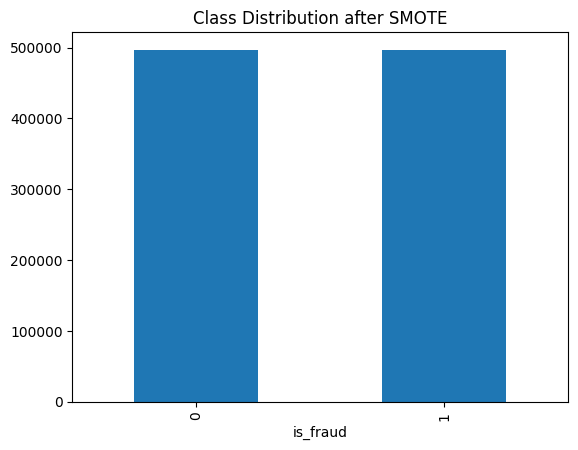

In [840]:
data_train_scaled['is_fraud'].value_counts().plot(kind='bar', title='Class Distribution after SMOTE')

<Axes: title={'center': 'Class Distribution in Test Set'}, xlabel='is_fraud'>

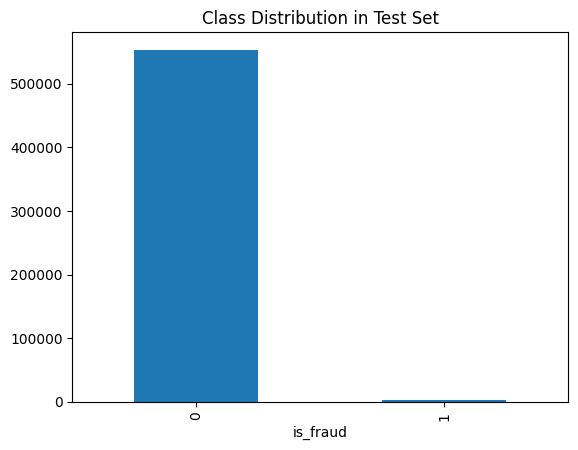

In [841]:
data_test_scaled['is_fraud'].value_counts().plot(kind='bar', title='Class Distribution in Test Set')    

In [842]:
data_test_scaled

,cc_num,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,distance_from_home,...,weekday,month,is_weekend,season,num_transactions,total_amount,avg_amt,amt_std,amt_z_score,is_fraud
0,-0.311600,-0.193871,-0.493852,-0.984110,1.306126,-0.299352,-0.037367,0.884501,-1.379653,-1.707659,...,1.413967,0.024619,1.451180,-0.262568,0.237083,0.107231,-0.254909,0.334441,-0.473840,0
1,-0.311600,0.637963,-0.628013,-0.984110,1.306126,-0.299352,-0.037367,0.733234,-1.390839,0.586139,...,1.413967,0.024619,1.451180,-0.262568,0.237083,0.107231,-0.254909,0.334441,-0.568105,0
2,-0.311600,-1.302984,-0.666598,-0.984110,1.306126,-0.299352,-0.037367,1.082976,-1.466161,1.708668,...,-1.507847,0.024619,-0.749571,-0.262568,0.237083,0.107231,-0.254909,0.334441,-0.595216,0
3,-0.311600,0.083407,-0.601204,-0.984110,1.306126,-0.299352,-0.037367,1.005238,-1.430130,-0.403896,...,-1.507847,0.024619,-0.749571,-0.262568,0.237083,0.107231,-0.254909,0.334441,-0.549268,0
4,-0.311600,0.915241,-0.425929,-0.984110,1.306126,-0.299352,-0.037367,0.870631,-1.439032,-1.413647,...,-1.020878,0.024619,-0.749571,-0.262568,0.237083,0.107231,-0.254909,0.334441,-0.426115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,3.601555,-1.302984,-0.664097,1.069216,0.500820,-0.302953,-1.543157,0.476387,0.080136,-1.169207,...,-0.046940,1.809080,-0.749571,1.595411,0.836685,0.514011,-0.285207,-0.613580,-0.580709,0
555715,3.601555,0.360685,-0.843007,1.069216,0.500820,-0.302953,-1.543157,0.420475,0.000637,0.199535,...,-0.046940,1.809080,-0.749571,1.595411,0.836685,0.514011,-0.285207,-0.613580,-0.828789,0
555716,3.601555,-1.302984,-0.577303,1.069216,0.500820,-0.302953,-1.543157,0.467162,0.060851,-1.502548,...,-0.046940,1.809080,-0.749571,1.595411,0.836685,0.514011,-0.285207,-0.613580,-0.460358,0
555717,3.601555,-0.748428,-0.421683,1.069216,0.500820,-0.302953,-1.543157,0.581260,-0.017987,0.214988,...,-0.046940,1.809080,-0.749571,1.595411,0.836685,0.514011,-0.285207,-0.613580,-0.244572,0


In [843]:
X_train_scaled = data_train_scaled.drop(columns=['is_fraud']).values    
X_test_scaled = data_test_scaled.drop(columns=['is_fraud']).values  
y_train = data_train_scaled['is_fraud'].values
y_test = data_test_scaled['is_fraud'].values    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:39:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:209: UserWarning: [16:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:215: UserWarning: [16:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


XGBoost Cross-Validation Results:
    train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0             0.534119           0.000375           0.534170          0.000906
1             0.427569           0.002422           0.427764          0.001158
2             0.358311           0.003136           0.358579          0.004035
3             0.316298           0.002189           0.316592          0.002762
4             0.281572           0.003986           0.281811          0.002827
..                 ...                ...                ...               ...
95            0.010488           0.000383           0.011346          0.000295
96            0.010230           0.000404           0.011078          0.000305
97            0.010017           0.000388           0.010864          0.000288
98            0.009816           0.000367           0.010671          0.000273
99            0.009630           0.000362           0.010475          0.000265

[100 rows x 4 col

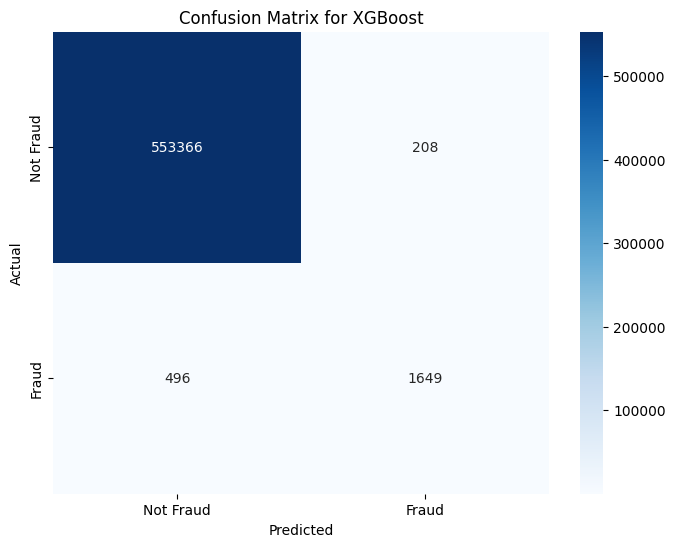

In [851]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns    

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=(non_fraud_num/fraud_num) * 0.001)  # Use scale_pos_weight for imbalanced data

xgb_classifier.fit(X_train_scaled, y_train) 
# do cross-validation
xgb_cv_results = xgb.cv(params=xgb_classifier.get_xgb_params(),
                        dtrain=xgb.DMatrix(X_train_scaled, label=y_train),
                        num_boost_round=100,
                        nfold=4,
                        metrics='logloss',
                        early_stopping_rounds=10,
                        as_pandas=True) 

print("XGBoost Cross-Validation Results:")
print(xgb_cv_results)
# Predict
y_pred_xgb = xgb_classifier.predict(X_test_scaled)  


# Metrics for XGBoost
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")     
print(f"Precision: {precision_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, zero_division=0):.4f}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()      